## Uso de MSE (Mean Squared Error) y MAE (Mean Absolute Error)
 Vamos a construir un modelo de regresión simple y comparar los efectos de ambas funciones de pérdida.
 Ejercicio práctico: Comparación de MSE y MAE en un modelo de regresión
Objetivo:
Implementar un modelo de regresión lineal y comparar cómo afectan las funciones de pérdida MSE y MAE en la optimización del modelo.
Requisitos:
-  Python (con bibliotecas como NumPy, Matplotlib, y Scikit-learn)
- Jupyter Notebook o entorno de desarrollo similar
Pasos:
1. Generar un conjunto de datos sintético: Vamos a crear un conjunto de datos con una relación lineal con algo de ruido aleatorio.
2. Entrenar el modelo de regresión lineal con MSE: Usaremos la función de pérdida MSE para entrenar el modelo.
3. Entrenar el modelo de regresión lineal con MAE: Usaremos la función de pérdida MAE para entrenar el modelo.
4. Comparar los resultados: Evaluamos cómo el modelo entrenado con MSE y con MAE se comporta en cuanto a precisión y sensibilidad a los valores atípicos.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

Error cuadrático medio (MSE):2.4882
Error absoluto medio (MAE):1.3049


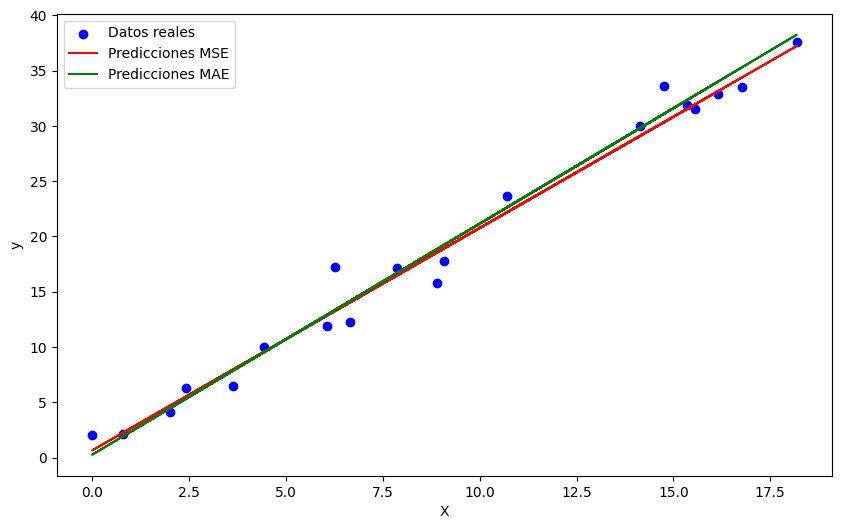

In [7]:
#Generar un conjunto de datos sintéticos
np.random.seed(42)

#Datos reales (relación lineal) con ruido añadido
X = 2 * np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(0, 2, X.shape[0]) #y = 2X + 1 + ruido normal con media cero y desv estandar 2


#Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Reformatear X para que se de el tamaño adecuado para scikit-learn (1 sola columna)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


#Entrenar el modelo con el método demínimos cuadrados MSE
model_mse = LinearRegression()
model_mse.fit(X_train, y_train)

#Realizar las predicciones con el modelo entrenado con MSE
y_pred_mse = model_mse.predict(X_test)



#Entrenar el modelo con el método de minimos cuadrados MAE
model_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0)
model_mae.fit(X_train, y_train)

#Realizar las predicciones con el modelo entrenado con MAE
y_pred_mae = model_mae.predict(X_test)


#Evaluar y comparar los modelos con MSE y MAE
mse = mean_squared_error(y_test, y_pred_mse)
mae = mean_absolute_error(y_test, y_pred_mae)

#Mostrar los resultados
print(f'Error cuadrático medio (MSE):{mse:.4f}')
print(f'Error absoluto medio (MAE):{mae:.4f}')


#Visualizar los resultados
plt.figure(figsize = (10,6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred_mse, color='red', label='Predicciones MSE')
plt.plot(X_test, y_pred_mae, color='green', label='Predicciones MAE')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()







